In [1]:
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("datasets/"))

# Any results you write to the current directory are saved as output.

['test_images.npy', 'test_images.npy.zip', 'train_images.npy', 'train_images.npy.zip', 'train_labels.csv']


In [2]:
#Load images with numpy
images = np.load('datasets/train_images.npy', encoding="latin1")
images.shape

(10000, 2)

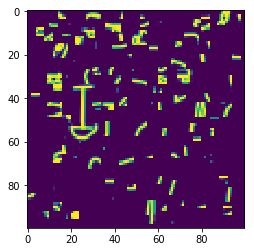

In [3]:
#Reshaping image to 100x100
image1 = (images[0][1]).reshape(100,100)
plt.imshow(image1)

Cropping the input images...
Time required: 73.75579118728638
Rescaling the images to a fixed size...
0 (30, 30)


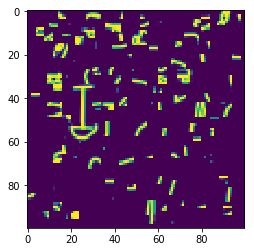

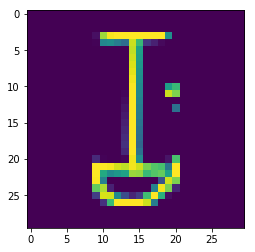

1 (30, 30)


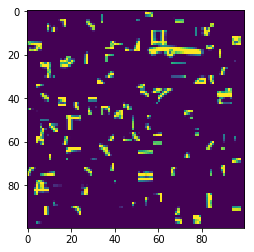

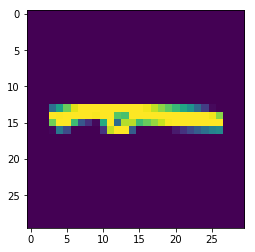

2 (30, 30)


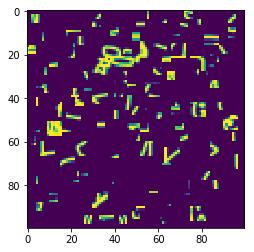

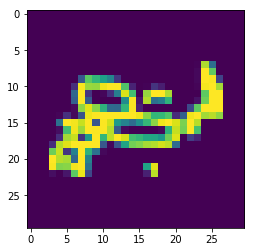

3 (30, 30)


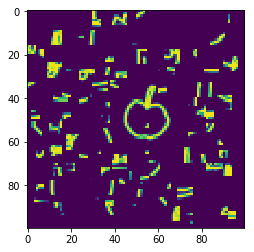

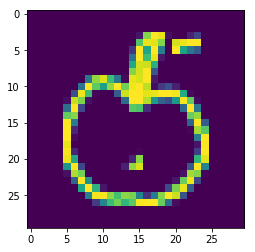

4 (30, 30)


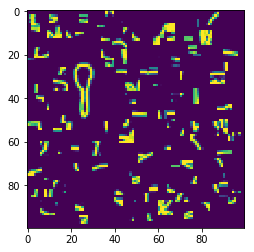

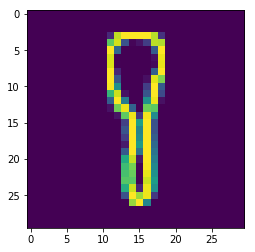

5 (30, 30)


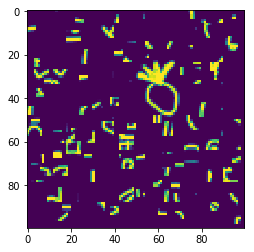

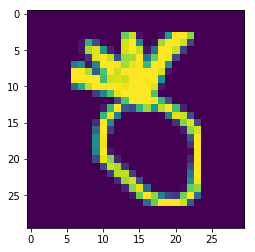

6 (30, 30)


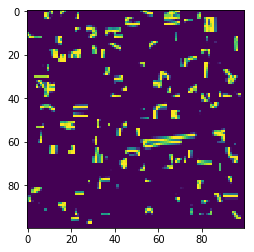

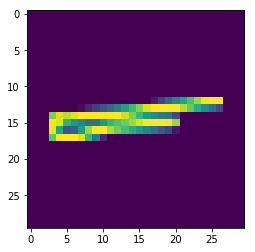

7 (30, 30)


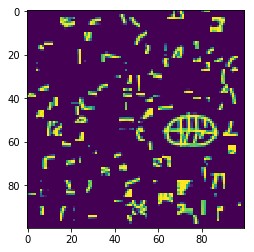

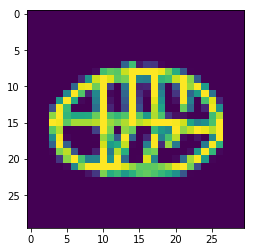

8 (30, 30)


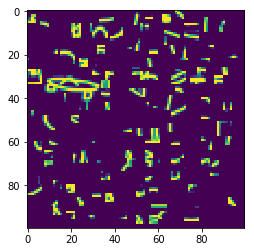

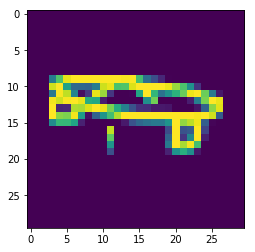

9 (30, 30)


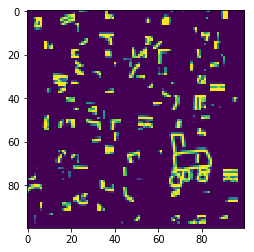

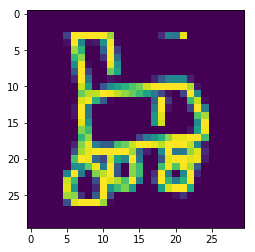

10 (30, 30)


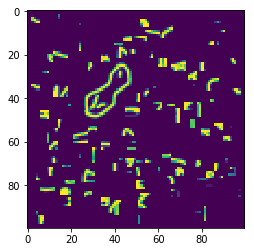

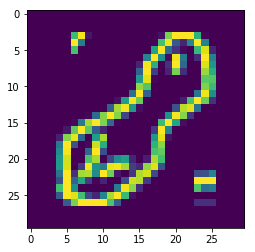

11 (30, 30)


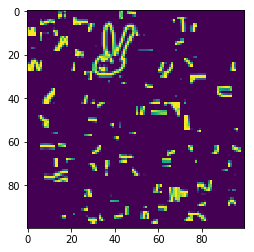

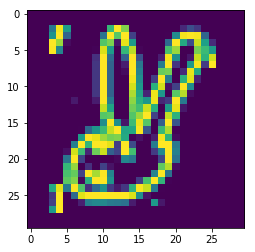

12 (30, 30)


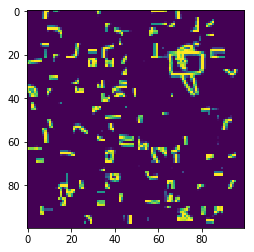

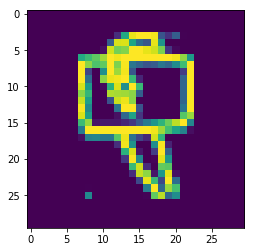

13 (30, 30)


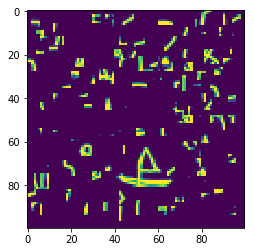

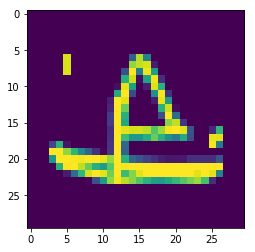

14 (30, 30)


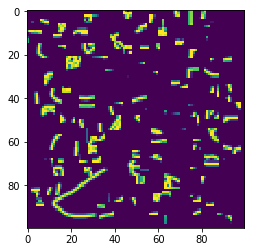

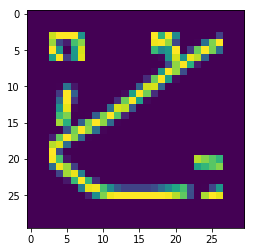

15 (30, 30)


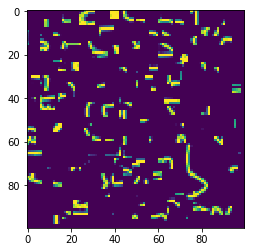

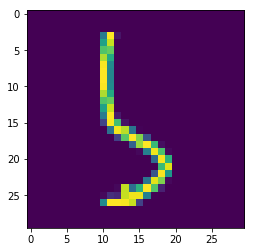

16 (30, 30)


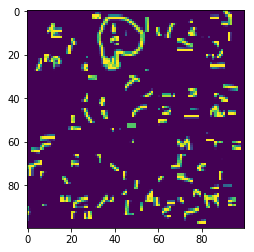

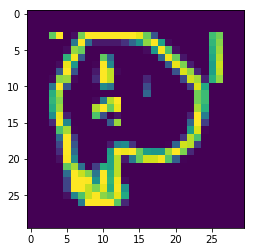

17 (30, 30)


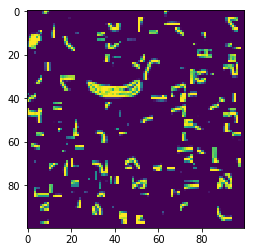

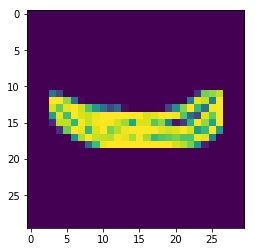

18 (30, 30)


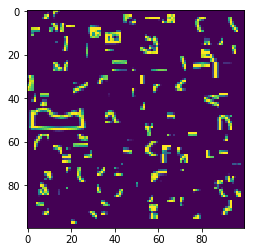

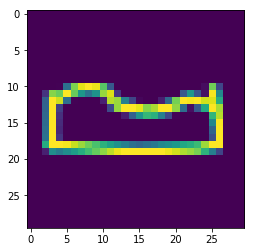

19 (30, 30)


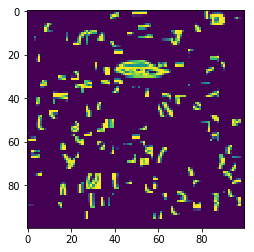

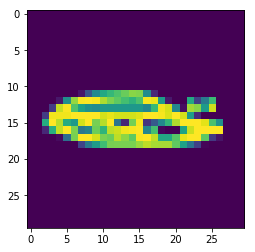

20 (30, 30)


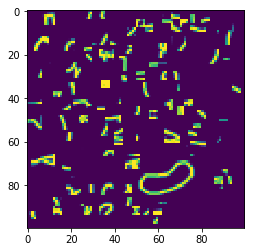

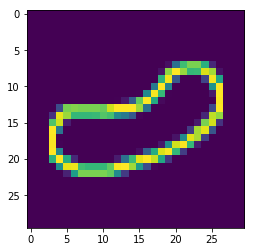

21 (30, 30)


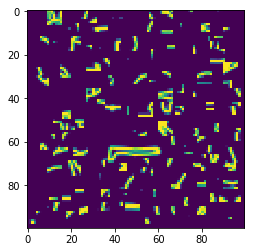

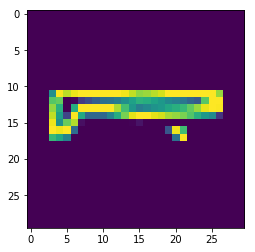

22 (30, 30)


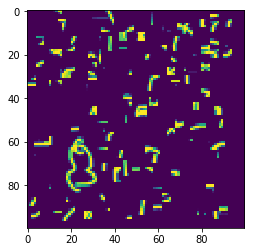

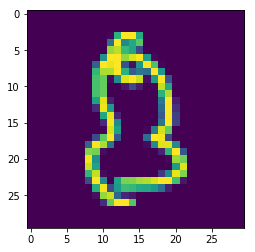

23 (30, 30)


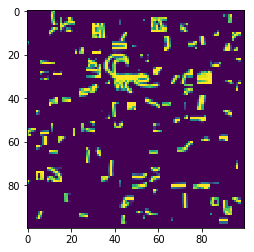

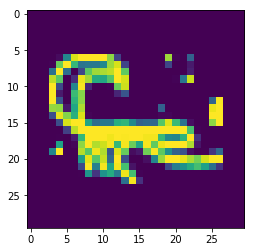

24 (30, 30)


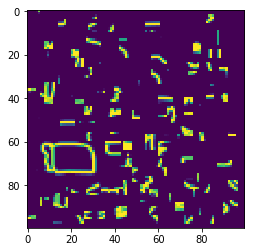

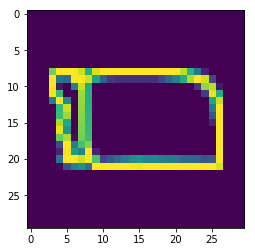

25 (30, 30)


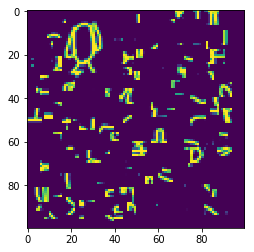

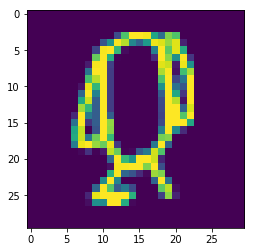

26 (30, 30)


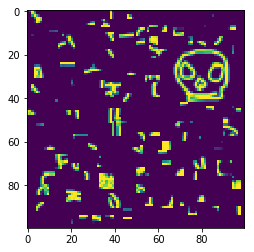

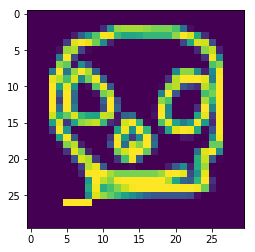

27 (30, 30)


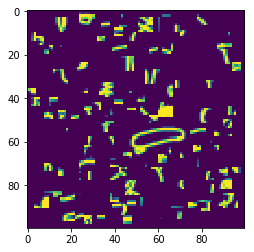

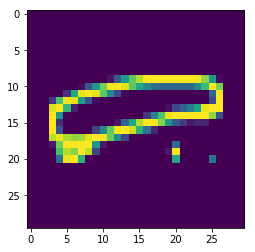

28 (30, 30)


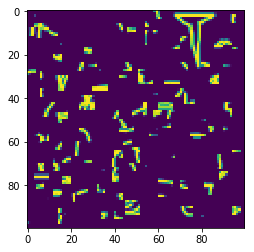

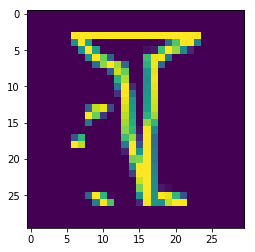

29 (30, 30)


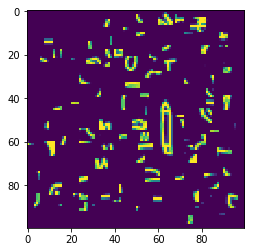

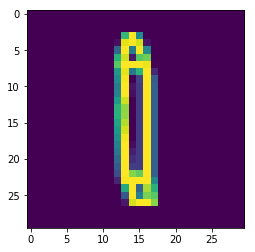

30 (30, 30)


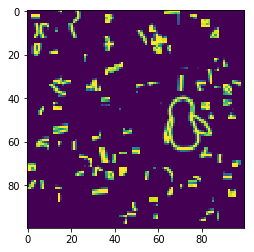

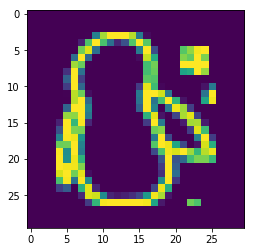

31 (30, 30)


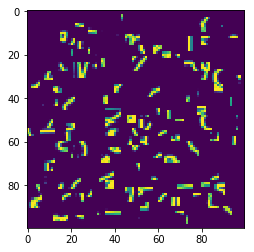

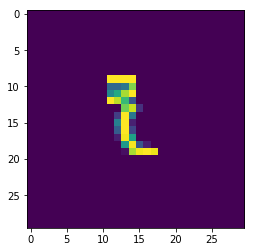

32 (30, 30)


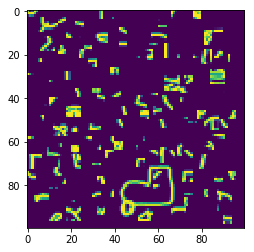

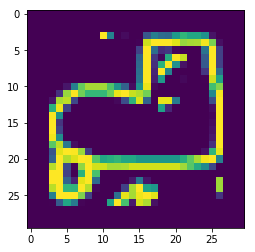

33 (30, 30)


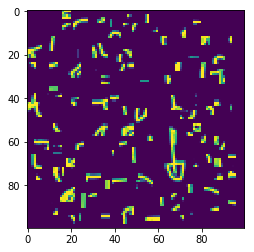

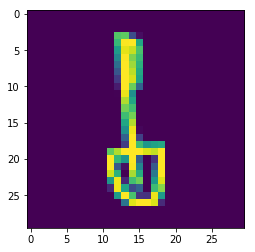

34 (30, 30)


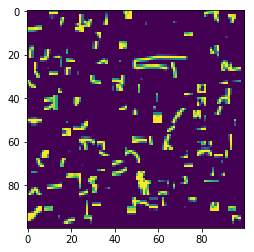

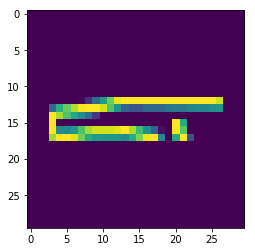

35 (30, 30)


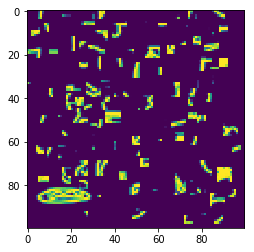

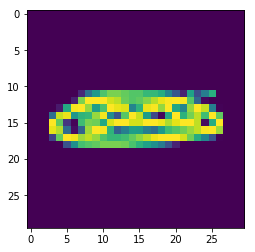

36 (30, 30)


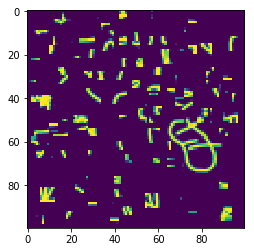

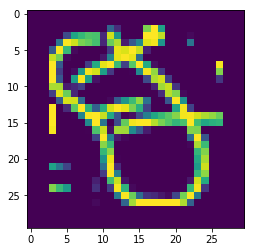

37 (30, 30)


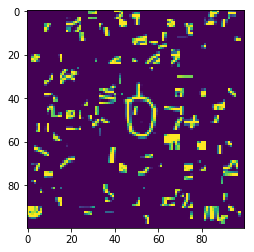

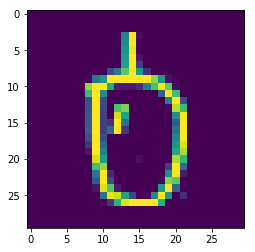

38 (30, 30)


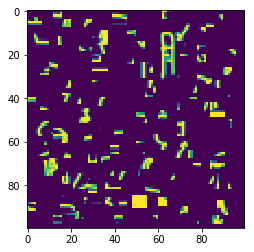

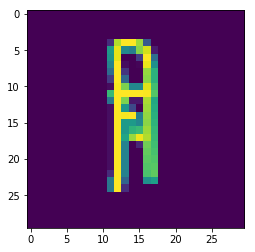

39 (30, 30)


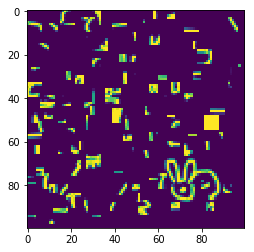

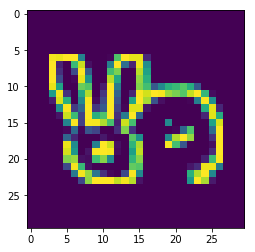

40 (30, 30)


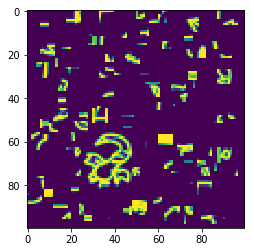

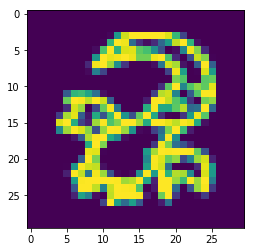

41 (30, 30)


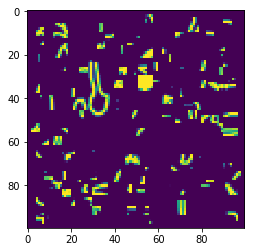

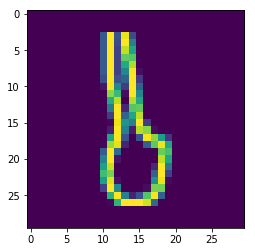

42 (30, 30)


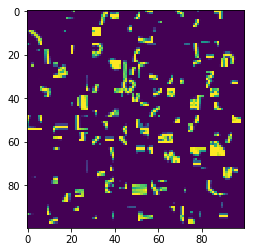

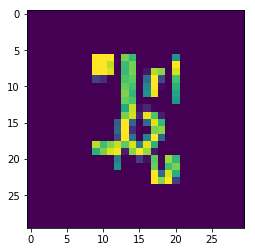

43 (30, 30)


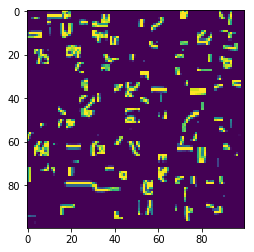

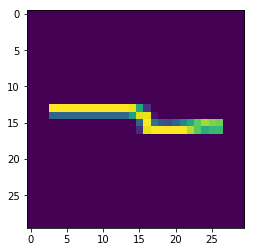

44 (30, 30)


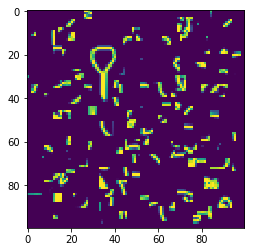

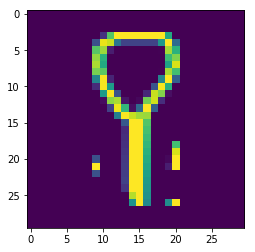

45 (30, 30)


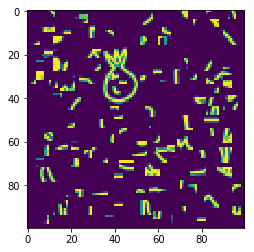

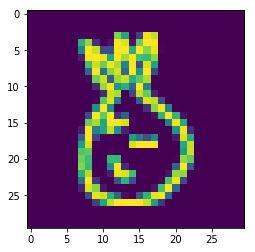

46 (30, 30)


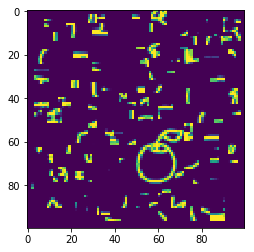

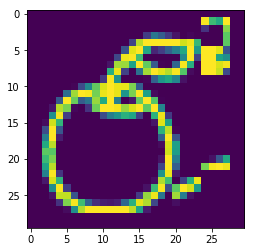

47 (30, 30)


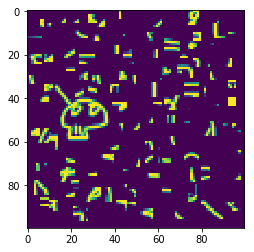

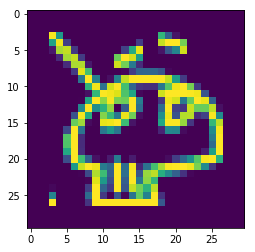

48 (30, 30)


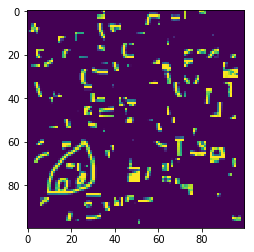

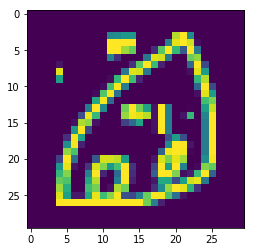

49 (30, 30)


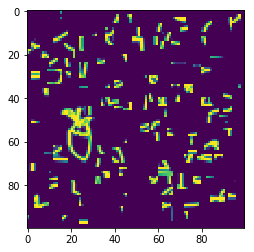

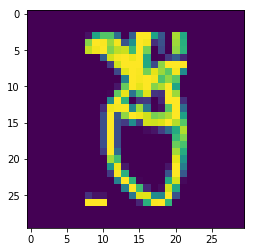

50 (30, 30)


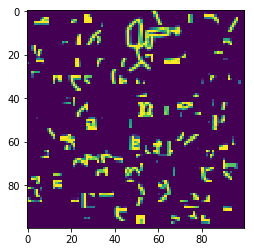

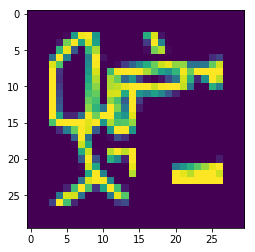

51 (30, 30)


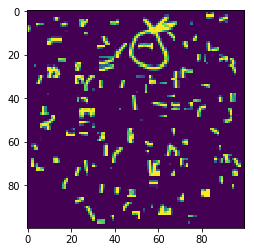

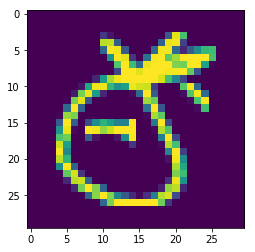

52 (30, 30)


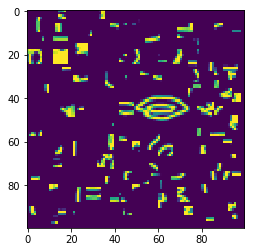

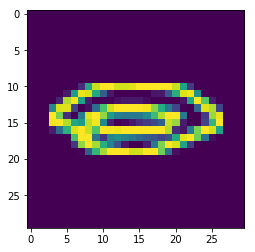

53 (30, 30)


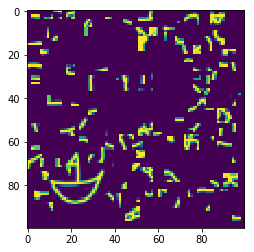

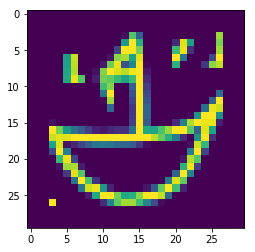

54 (30, 30)


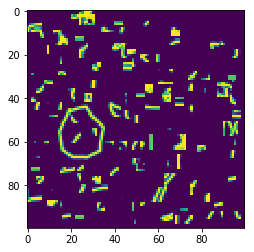

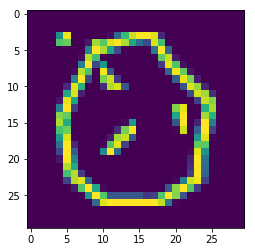

55 (30, 30)


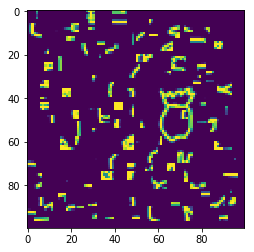

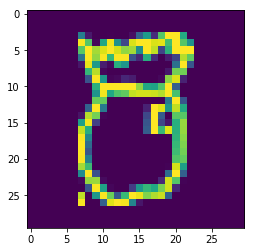

56 (30, 30)


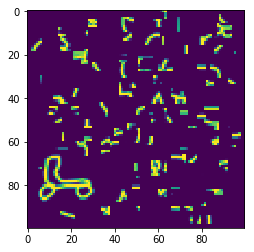

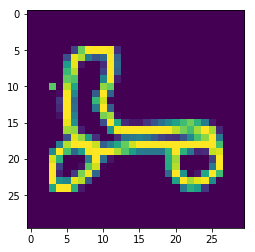

57 (30, 30)


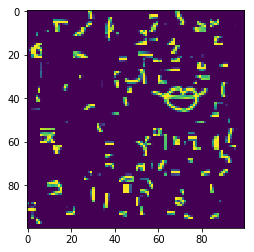

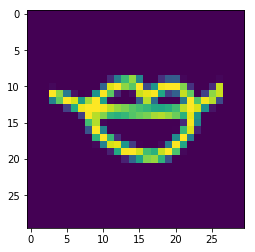

58 (30, 30)


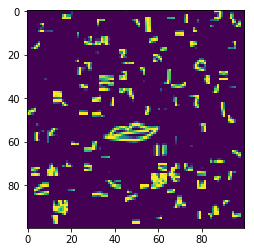

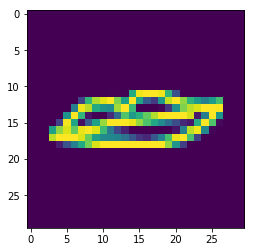

59 (30, 30)


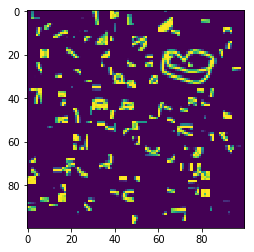

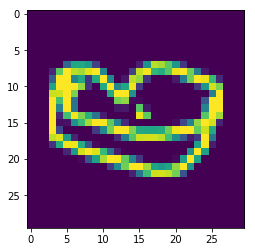

60 (30, 30)


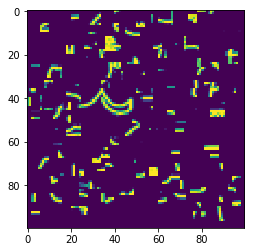

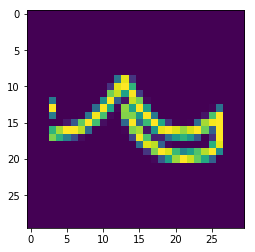

TypeError: slice indices must be integers or None or have an __index__ method

In [14]:
from scipy.sparse.csgraph import connected_components
import time

tim = time.time()

n_images = images.shape[0]
image_size = images[0][1].shape[0]
width = 100
height = 100
threshold = 150

new_images = []

print("Cropping the input images...")

#for i in range(n_images):
for i in range(100):
    image = images[i][1]
    image_2d = image.reshape(height, width)
    
    graph = np.zeros((image_size, image_size), dtype=np.int8)
    
    # compute the non-zero neighbor adjacency matrix
    for j in range(image_size):
        if image[j] >= threshold:
            # top-left neighbor
            if  j >= width and j % width != 0 and image[j - width - 1] >= threshold: 
                graph[j][j - width - 1] = 1

            # top neighbor
            if j >= width and image[j - width] >= threshold:
                graph[j][j - width] = 1

            # top-right neighbor
            if j >= width and j % width != width - 1 and image[j - width + 1] >= threshold:
                graph[j][j - width + 1] = 1
                
            # left neighbor
            if j % width != 0 and image[j - 1] >= threshold:
                graph[j][j - 1] = 1
            
            # right neighbor
            if j % width != width - 1 and image[j + 1] >= threshold:
                graph[j][j + 1] = 1
            
            # bottom-left neighbor
            if j < width*height - width and j % width != 0 and image[j + width - 1] >= threshold:
                graph[j][j + width - 1] = 1
                
            # bottom neighbor
            if j < width*height - width and image[j + width] >= threshold:
                graph[j][j + width] = 1
                
            # bottom-right neighbor
            if j < width*height - width and j % width != width - 1 and image[j + width + 1] >= threshold:
                graph[j][j + width + 1] = 1
                
    # non-zero nodes in the graph
    nodes = np.unique(graph.nonzero()[0])
    graph = graph[nodes[:, None], nodes]
    
    # find connected components
    n_components, components = connected_components(graph, directed=False)
    
    # find the component which spans the largest area
    max_area = 0
    largest = None
    
    for component in range(n_components):
        nodes_in_component = nodes[np.where(components == component)]
        
        min_x = width
        max_x = 0
        min_y = height
        max_y = 0
        
        for node in nodes_in_component:
            min_x = min(min_x, node % width) # left boundary
            max_x = max(max_x, node % width) # right boundary
            min_y = min(min_y, int(node / width)) # top boundary
            max_y = max(max_y, int(node / width)) # bottom boundary
            
        area = (max_x - min_x) * (max_y - min_y)
        if area > max_area:
            max_area = area
            largest = (min_x, max_x + 1, min_y, max_y + 1)
        
    if largest != None:
        new_images.append(image_2d[largest[2]:largest[3], largest[0]:largest[1]])
    else:
        new_images.append(image_2d[40:60, 40:60]) # debug for blank images just in case
    
    print("Image count: {}".format(i+1), end='\r')
    
print("Time required: {}".format(time.time() - tim))
    
# compute fixed height and width for the preprocessed images
new_height = 30
new_width = 30
    
print("Rescaling the images to a fixed size...")

for i in range(len(new_images)):
    image = new_images[i]
    
    if image.shape[0] > new_height:
        diff = image.shape[0] - new_height
        image = image[np.floor(diff/2):(image.shape[0] - np.ceil(diff/2)), :]
        
    if image.shape[1] > new_width:
        diff = image.shape[1] - new_width
        image = image[:, np.floor(diff/2):(image.shape[0] - np.ceil(diff/2))]
        
    y_diff = new_height - image.shape[0]
    x_diff = new_width - image.shape[1]
    
    new_images[i] = np.pad(image, [(int(np.floor(y_diff/2)), int(np.ceil(y_diff/2))), 
                                   (int(np.floor(x_diff/2)), int(np.ceil(x_diff/2)))], mode='constant')
        
    #print("Image count: {}".format(i+1), end='\r')
    
    print(i, new_images[i].shape)
    plt.imshow(images[i][1].reshape(height, width))
    plt.show()
    
    plt.imshow(new_images[i])
    plt.show()